**IMOPRTING LIBRARIES**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV

**READING DATA USING PANDAS**

In [2]:
data = pd.read_csv('prod_.csv')
data.head(15)

,product,year,expiri duretion in years,month,no. of new products bought,no of products left for selling,no. of products sold,prodects left,no of products to be bought,demand %
0,colgate,2019,2.0,1,60,60,46,0,46.0,76.666667
1,colgate,2019,2.0,2,32,46,38,14,24.0,118.750000
2,colgate,2019,2.0,3,40,62,47,22,25.0,117.500000
3,colgate,2019,2.0,4,36,51,40,15,25.0,111.111111
4,colgate,2019,2.0,5,56,67,58,11,47.0,103.571429
5,colgate,2019,2.0,6,41,50,39,9,30.0,95.121951
6,colgate,2019,2.0,7,58,69,51,11,40.0,87.931034
7,colgate,2019,2.0,8,31,47,47,16,31.0,151.612903
8,colgate,2019,2.0,9,100,100,56,0,56.0,56.000000
9,colgate,2019,2.0,10,0,44,44,44,44.0,44.000000


In [3]:
data['product'].unique()

array(['colgate', 'gemini  tea powder', 'suger', 'freedom sunflower oil',
       'life boy soap', 'santoor'], dtype=object)

**ENCODING DATA**

In [4]:
ohe = OneHotEncoder()
ohe.fit(data[['product']])
ct=make_column_transformer((OneHotEncoder(),[0]),remainder='passthrough')

**DENPENDENT AND INDIPENDENT VARIABLES**

In [5]:
x = data.iloc[:,[0,1,3]].values
y = data.iloc[:, [6]].values

In [6]:
o=data.iloc[36:68,[2]]
o['expiri duretion in years'].unique()

array([2.])

In [7]:
p=0
q=36
r=[]
for i in range(0,6):
    s=data.iloc[p:q,[2]]
    r.append(float(s['expiri duretion in years'].unique()))
    p=q
    q=q+41

C:\Users\Archana\AppData\Local\Temp\ipykernel_18304\4061790406.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  r.append(float(s['expiri duretion in years'].unique()))


In [8]:
r

[2.0, 2.0, 2.0, 0.6, 1.0, 1.0]

In [9]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [10]:
print(x)

[['colgate' 2019 1]
 ['colgate' 2019 2]
 ['colgate' 2019 3]
 ['colgate' 2019 4]
 ['colgate' 2019 5]
 ['colgate' 2019 6]
 ['colgate' 2019 7]
 ['colgate' 2019 8]
 ['colgate' 2019 9]
 ['colgate' 2019 10]
 ['colgate' 2019 11]
 ['colgate' 2019 12]
 ['colgate' 2020 1]
 ['colgate' 2020 2]
 ['colgate' 2020 3]
 ['colgate' 2020 4]
 ['colgate' 2020 5]
 ['colgate' 2020 6]
 ['colgate' 2020 7]
 ['colgate' 2020 8]
 ['colgate' 2020 9]
 ['colgate' 2020 10]
 ['colgate' 2020 11]
 ['colgate' 2020 12]
 ['colgate' 2021 1]
 ['colgate' 2021 2]
 ['colgate' 2021 3]
 ['colgate' 2021 4]
 ['colgate' 2021 5]
 ['colgate' 2021 6]
 ['colgate' 2021 7]
 ['colgate' 2021 8]
 ['colgate' 2021 9]
 ['colgate' 2021 10]
 ['colgate' 2021 11]
 ['colgate' 2021 12]
 ['gemini  tea powder' 2019 1]
 ['gemini  tea powder' 2019 2]
 ['gemini  tea powder' 2019 3]
 ['gemini  tea powder' 2019 4]
 ['gemini  tea powder' 2019 5]
 ['gemini  tea powder' 2019 6]
 ['gemini  tea powder' 2019 7]
 ['gemini  tea powder' 2019 8]
 ['gemini  tea powder' 

**DIVIDING THE DATA INTO TRAINING AND TESTING SET**

In [11]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [12]:
x_train

array([['life boy soap', 2019, 8],
       ['gemini  tea powder', 2019, 5],
       ['colgate', 2020, 2],
       ['freedom sunflower oil', 2019, 5],
       ['suger', 2020, 1],
       ['colgate', 2021, 1],
       ['colgate', 2021, 7],
       ['gemini  tea powder', 2021, 1],
       ['gemini  tea powder', 2020, 9],
       ['life boy soap', 2019, 3],
       ['suger', 2021, 1],
       ['colgate', 2020, 8],
       ['life boy soap', 2019, 10],
       ['life boy soap', 2020, 6],
       ['gemini  tea powder', 2020, 7],
       ['life boy soap', 2020, 10],
       ['suger', 2019, 4],
       ['gemini  tea powder', 2020, 4],
       ['suger', 2021, 8],
       ['freedom sunflower oil', 2022, 1],
       ['freedom sunflower oil', 2019, 1],
       ['suger', 2019, 10],
       ['life boy soap', 2020, 8],
       ['freedom sunflower oil', 2019, 9],
       ['life boy soap', 2019, 1],
       ['suger', 2021, 11],
       ['gemini  tea powder', 2019, 6],
       ['colgate', 2020, 3],
       ['colgate', 2021, 4],
   

In [13]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

# **REGRESSION MODELS**

# LinearRegression

In [14]:
lr = LinearRegression()

MAKING PIPELINE

In [15]:
from pandas.core.algorithms import mode
from sklearn import pipeline
pipe=make_pipeline(ct,lr)
pipe.fit(x_train,y_train)

,steps,"[('columntransformer', ...), ('linearregression', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('onehotencoder', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


SCORE

In [16]:
y_pred= pipe.predict(x_test)
score = r2_score(y_pred,y_test)
score

0.9052419107147865

In [17]:
scores=[]
for i in range(1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=i)
    dt = LinearRegression()
    piped=make_pipeline(ct,dt)
    piped.fit(x_train,y_train)
    y_pred=piped.predict(x_test)
    scores.append(r2_score(y_test,y_pred))
scores[np.argmax(scores)]

0.9855205302905801

In [18]:
pipe.predict([['santoor',2021,3]])

array([[153.92103069]])

In [19]:
c=[]
for i in range(0,12):
  c.append(float(pipe.predict([['colgate',2023,i]])))

C:\Users\Archana\AppData\Local\Temp\ipykernel_18304\2857788156.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  c.append(float(pipe.predict([['colgate',2023,i]])))
C:\Users\Archana\AppData\Local\Temp\ipykernel_18304\2857788156.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  c.append(float(pipe.predict([['colgate',2023,i]])))
C:\Users\Archana\AppData\Local\Temp\ipykernel_18304\2857788156.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  c.append(float(pipe.

In [20]:
c

[130.18501508721238,
 130.42168492096243,
 130.65835475470521,
 130.89502458845527,
 131.13169442219805,
 131.3683642559481,
 131.60503408969817,
 131.84170392344095,
 132.078373757191,
 132.31504359094106,
 132.55171342468384,
 132.7883832584339]

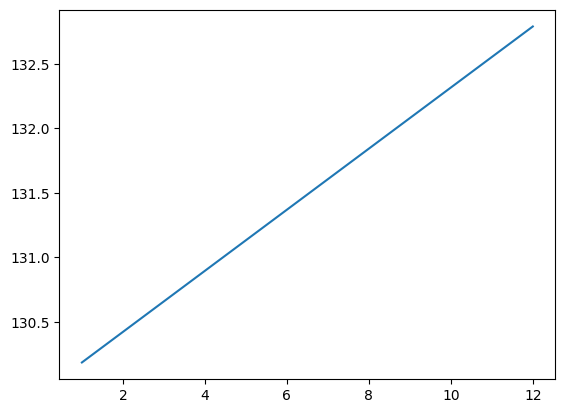

In [21]:
month=data.iloc[:12,[3]].values
plt.plot(month,c)
plt.show()

In [22]:
warnings.simplefilter(action='ignore', category=UserWarning)

# DecisionTreeRegressor

In [23]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import fbeta_score, make_scorer
dt = DecisionTreeRegressor()
parameters = {'max_depth':(1,2,3,4,5,6,7,8,9,10)}
scoring_function = make_scorer(fbeta_score, beta=2)
dtg = GridSearchCV(dt, param_grid=parameters, scoring=scoring_function)
piped = make_pipeline(ct,sc,dtg)
piped.fit(x_train,y_train)
y_pred=piped.predict(x_test)
r2_score(y_test,y_pred)

0.8615531417887847

In [24]:
c_=[]
for i in range(0,12):
    c_.append(float(piped.predict([['colgate',2022,i]])))

C:\Users\Archana\AppData\Local\Temp\ipykernel_18304\946627452.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  c_.append(float(piped.predict([['colgate',2022,i]])))
C:\Users\Archana\AppData\Local\Temp\ipykernel_18304\946627452.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  c_.append(float(piped.predict([['colgate',2022,i]])))
C:\Users\Archana\AppData\Local\Temp\ipykernel_18304\946627452.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  c_.append(float(pip

In [25]:
c_

[67.81818181818181,
 67.81818181818181,
 67.81818181818181,
 67.81818181818181,
 67.81818181818181,
 67.81818181818181,
 67.81818181818181,
 67.81818181818181,
 67.81818181818181,
 67.81818181818181,
 67.81818181818181,
 67.81818181818181]

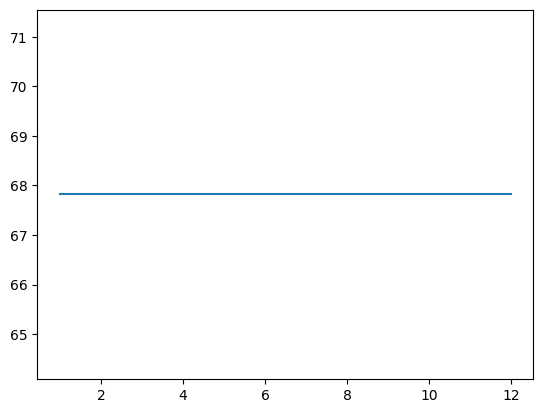

In [26]:
month=data.iloc[:12,[3]].values
plt.plot(month,c_)
plt.show()

# RandomForestRegressor

In [27]:
from sklearn.ensemble import RandomForestRegressor
estimator = RandomForestRegressor()

piper = make_pipeline(ct,estimator)
piper.fit(x_train, y_train)
y_pred= piper.predict(x_test)
r2_score(y_test, y_pred)

0.9388535956659307

In [28]:
piper.predict([['suger',2023,1]])

array([411.34])

In [29]:
k=data['product'].unique()
colgate1=[]
for j in range(1,13):
    colgate1.append(float(piper.predict([['colgate',2022,j]])))

C:\Users\Archana\AppData\Local\Temp\ipykernel_18304\1775140384.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  colgate1.append(float(piper.predict([['colgate',2022,j]])))
C:\Users\Archana\AppData\Local\Temp\ipykernel_18304\1775140384.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  colgate1.append(float(piper.predict([['colgate',2022,j]])))
C:\Users\Archana\AppData\Local\Temp\ipykernel_18304\1775140384.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  colg

In [30]:
k

array(['colgate', 'gemini  tea powder', 'suger', 'freedom sunflower oil',
       'life boy soap', 'santoor'], dtype=object)

In [31]:
p1=[]
p2=[]
p3=[]
p4=[]
p5=[]
p6=[]
for i in range(0,6):
  for j in range(1,13):
    if i==0:
      p1.append(float(piper.predict([[k[i],2022,j]])))
    if i==1:
      p2.append(float(piper.predict([[k[i],2022,j]])))
    if i==2:
      p3.append(float(piper.predict([[k[i],2022,j]])))
    if i==3:
      p4.append(float(piper.predict([[k[i],2022,j]])))
    if i==4:
      p5.append(float(piper.predict([[k[i],2022,j]])))
    if i==5:
      p6.append(float(piper.predict([[k[i],2022,j]])))
    


C:\Users\Archana\AppData\Local\Temp\ipykernel_18304\2863260073.py:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  p1.append(float(piper.predict([[k[i],2022,j]])))
C:\Users\Archana\AppData\Local\Temp\ipykernel_18304\2863260073.py:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  p1.append(float(piper.predict([[k[i],2022,j]])))
C:\Users\Archana\AppData\Local\Temp\ipykernel_18304\2863260073.py:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  p1.append(float(piper.p

In [32]:
p2

[42.18,
 43.69,
 46.03,
 40.67,
 36.08,
 37.97,
 38.08,
 38.74,
 37.98,
 37.84,
 37.68,
 38.44]

# month vs demand graph

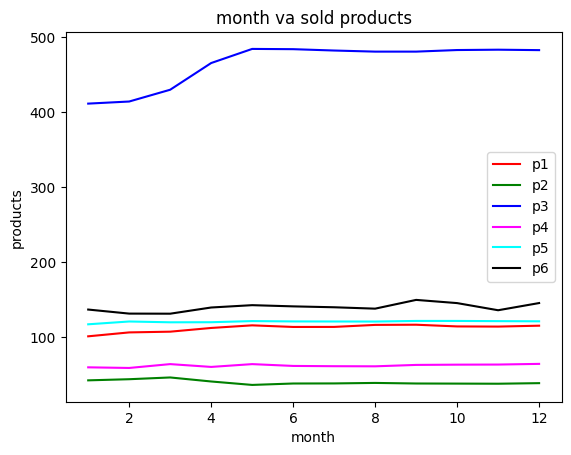

In [33]:
month=data.iloc[:12,[3]].values
plt.plot(month,p1,c='red',label='p1')
plt.plot(month,p2,c='green',label='p2')
plt.plot(month,p3,c='blue',label='p3')
plt.plot(month,p4,c='magenta',label='p4')
plt.plot(month,p5,c='cyan',label='p5')
plt.plot(month,p6,c='black',label='p6')
plt.title('month va sold products')
plt.xlabel('month')
plt.ylabel('products')
plt.legend()
plt.show()

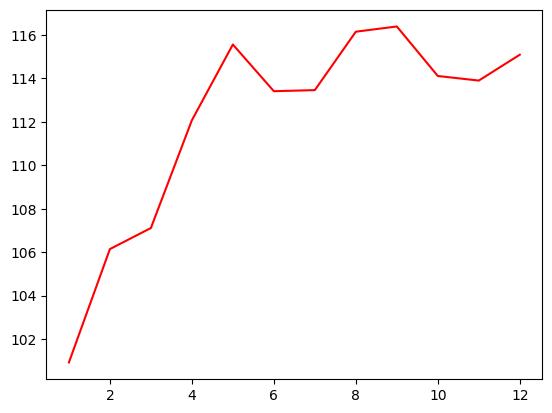

In [34]:
month=data.iloc[:12,[3]].values
plt.plot(month,colgate1,c='red',label='p1')
plt.show()

In [35]:
k

array(['colgate', 'gemini  tea powder', 'suger', 'freedom sunflower oil',
       'life boy soap', 'santoor'], dtype=object)

In [36]:
m=0
n=36
p=[]
for i in range(0,6):
    k[i]=data.iloc[m:n,[0,1,3,6]]
    k[i]=pd.DataFrame(k[i])
    k[i]=k[i].rename(columns={0:"product",1:'year',2:'month',3:'sold product'})
    m= n
    n=n+41


In [37]:
b=k[0]['month'].unique().tolist()

In [38]:
def to2D(twoD):
    oneD = []
    for i in twoD:
        oneD.extend(i)
    return(oneD)

In [39]:
k[0]

,product,year,month,no. of products sold
0,colgate,2019,1,46
1,colgate,2019,2,38
2,colgate,2019,3,47
3,colgate,2019,4,40
4,colgate,2019,5,58
5,colgate,2019,6,39
6,colgate,2019,7,51
7,colgate,2019,8,47
8,colgate,2019,9,56
9,colgate,2019,10,44


In [40]:

to2D(k[0].iloc[24:36,[3]].values.tolist())

[74, 86, 89, 95, 112, 98, 99, 115, 112, 98, 110, 109]

# pie chart

Text(0.5, 1.0, 'colgate 2021')

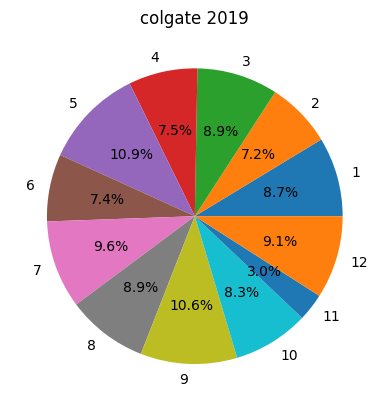

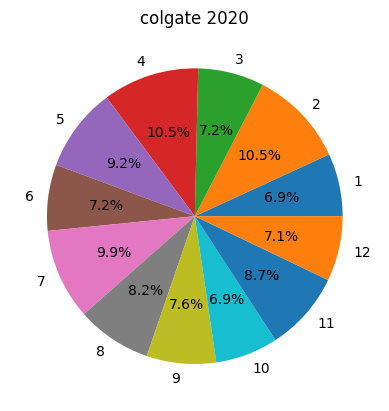

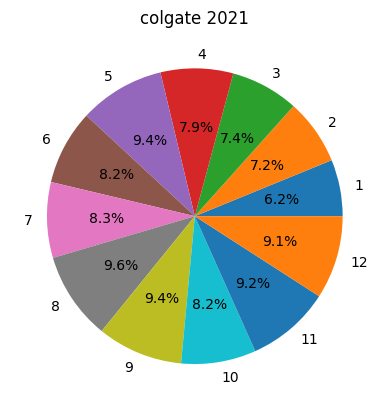

In [41]:
fig, ax = plt.subplots()
ax.pie(to2D(k[0].iloc[:12,[3]].values.tolist()),labels=b,autopct='%1.1f%%')
ax.set_title('colgate 2019')
fig,ax2 = plt.subplots()
ax2.pie(to2D(k[0].iloc[12:24,[3]].values.tolist()),labels=b,autopct='%1.1f%%')
ax2.set_title('colgate 2020')
fig,ax3 = plt.subplots()
ax3.pie(to2D(k[0].iloc[24:36,[3]].values.tolist()),labels=b,autopct='%1.1f%%')
ax3.set_title('colgate 2021')

# Bar graph

In [42]:
for i in range(0,6):
  k[i]=k[i].pivot(index='month', columns = 'year',values = 'no. of products sold')

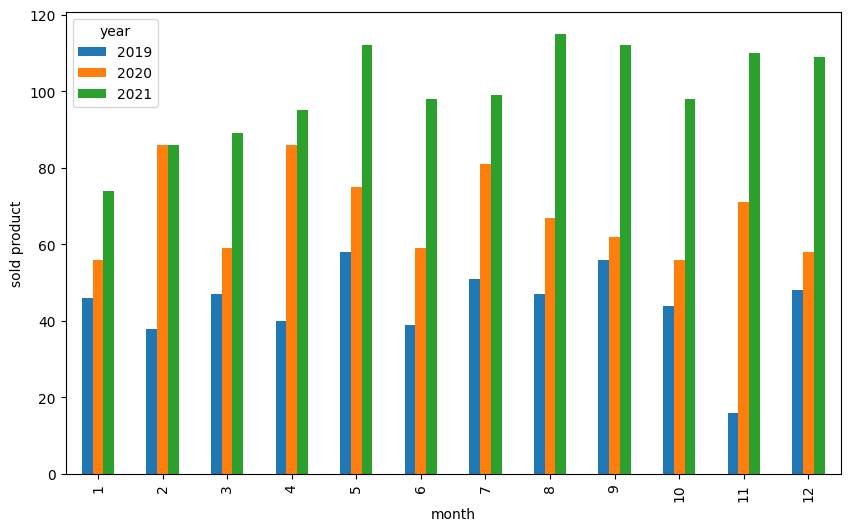

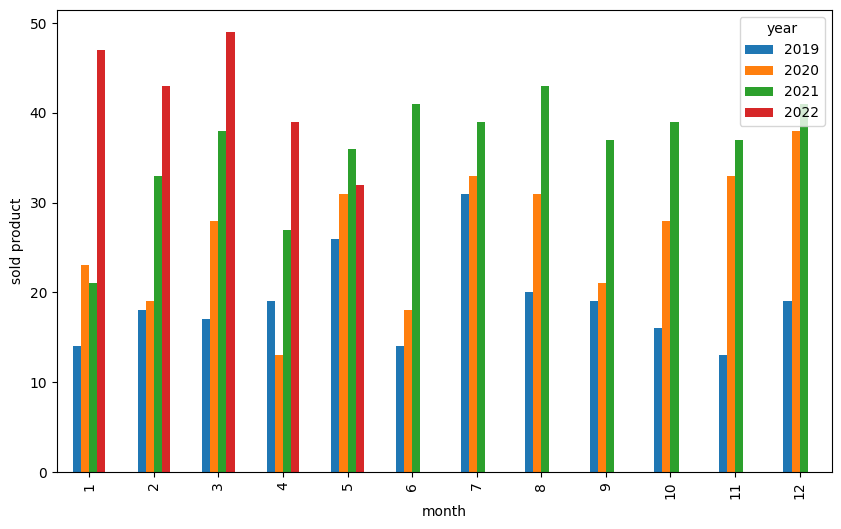

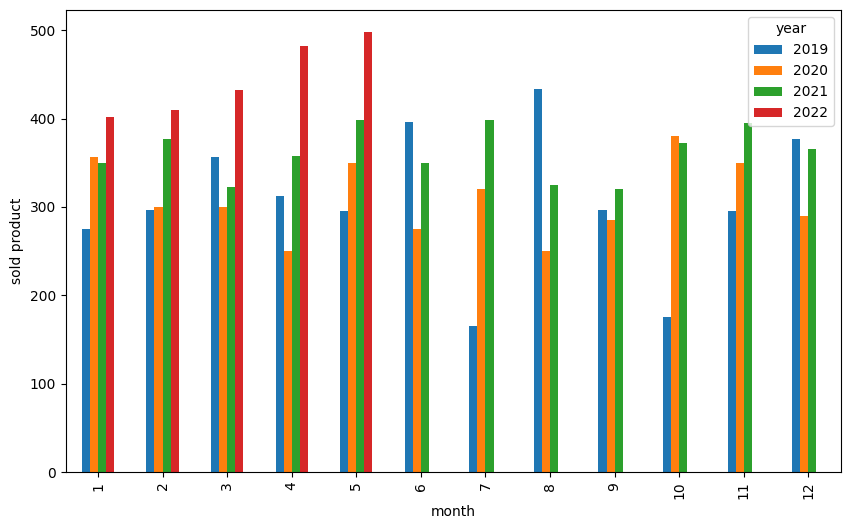

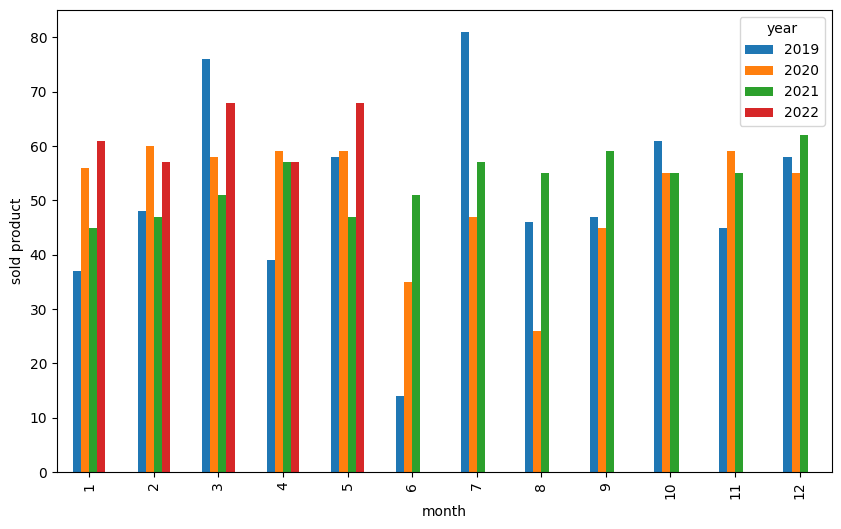

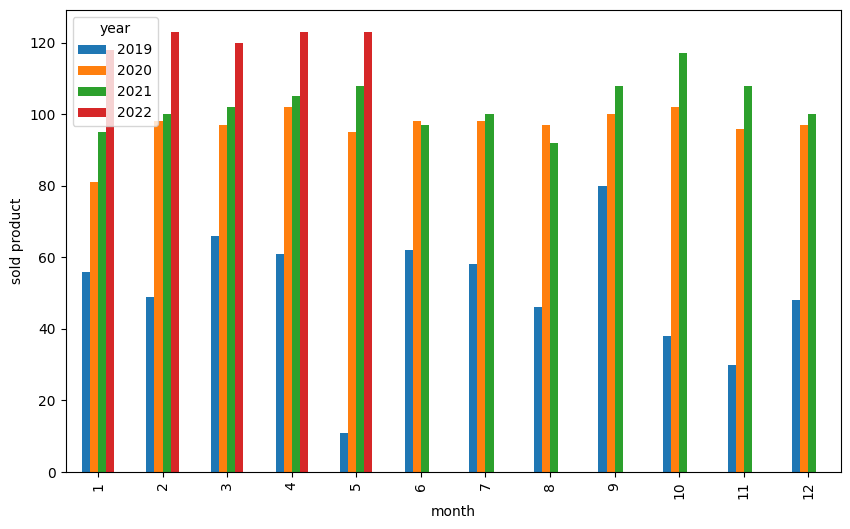

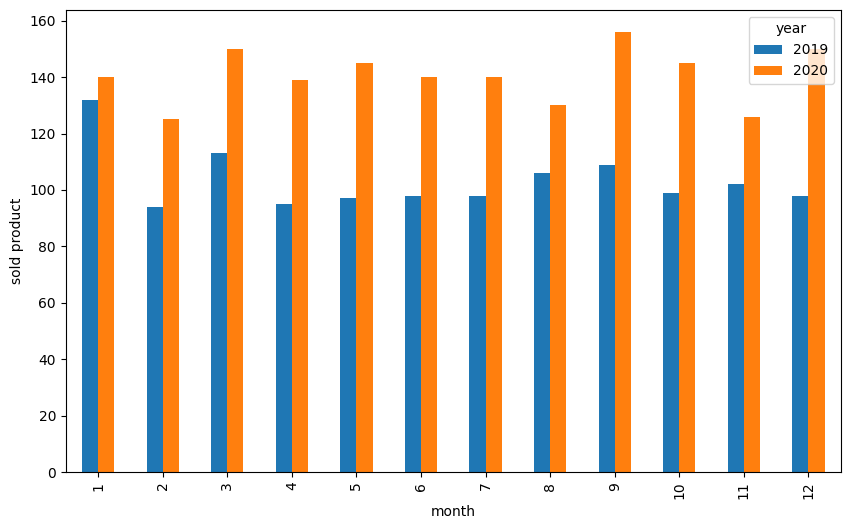

In [43]:
for i in range(0,6):
  k[i].plot(kind='bar',figsize=(10,6))
  plt.xlabel('month')
  plt.ylabel('sold product')

In [44]:
colgate=data.iloc[:36,[0,1,2,5]].values
colgate=pd.DataFrame(colgate)
colgate=colgate.rename(columns={0:"product",1:'year',2:'month',3:'sold product'})
colgate

,product,year,month,sold product
0,colgate,2019,2.0,60
1,colgate,2019,2.0,46
2,colgate,2019,2.0,62
3,colgate,2019,2.0,51
4,colgate,2019,2.0,67
5,colgate,2019,2.0,50
6,colgate,2019,2.0,69
7,colgate,2019,2.0,47
8,colgate,2019,2.0,100
9,colgate,2019,2.0,44


In [45]:
gta= data.iloc[36:72,[0,1,2,5]].values
gta=pd.DataFrame(gta)
gta=gta.rename(columns={0:"product",1:'year',2:'month',3:'sold product'})
gta

,product,year,month,sold product
0,gemini tea powder,2019,2.0,20
1,gemini tea powder,2019,2.0,28
2,gemini tea powder,2019,2.0,23
3,gemini tea powder,2019,2.0,20
4,gemini tea powder,2019,2.0,31
5,gemini tea powder,2019,2.0,30
6,gemini tea powder,2019,2.0,36
7,gemini tea powder,2019,2.0,20
8,gemini tea powder,2019,2.0,20
9,gemini tea powder,2019,2.0,16


# xgboost

In [48]:

import xgboost as xg
xgb_r = xg.XGBRegressor(objective ='reg:linear',n_estimators = 10, seed = 123)
pipex = make_pipeline(ct,xgb_r)
pipex.fit(x_train, y_train)
y_pred= pipex.predict(x_test)
r2_score(y_test, y_pred)

0.9688249230384827

In [49]:
pipex.predict([['colgate',2022,3]])

array([102.1795], dtype=float32)

In [50]:
k=data['product'].unique()
k[1]

'gemini  tea powder'

# month vs sold prodects

In [51]:
p1=[]
p2=[]
p3=[]
p4=[]
p5=[]
p6=[]
for i in range(0,6):
  for j in range(1,13):
    if i==0:
      p1.append(float(pipex.predict([[k[i],2022,j]])))
    if i==1:
      p2.append(float(pipex.predict([[k[i],2022,j]])))
    if i==2:
      p3.append(float(pipex.predict([[k[i],2022,j]])))
    if i==3:
      p4.append(float(pipex.predict([[k[i],2022,j]])))
    if i==4:
      p5.append(float(pipex.predict([[k[i],2022,j]])))
    if i==5:
      p6.append(float(pipex.predict([[k[i],2022,j]])))
    


C:\Users\Archana\AppData\Local\Temp\ipykernel_18304\3218878615.py:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  p1.append(float(pipex.predict([[k[i],2022,j]])))
C:\Users\Archana\AppData\Local\Temp\ipykernel_18304\3218878615.py:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  p1.append(float(pipex.predict([[k[i],2022,j]])))
C:\Users\Archana\AppData\Local\Temp\ipykernel_18304\3218878615.py:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  p1.append(float(pipex.p

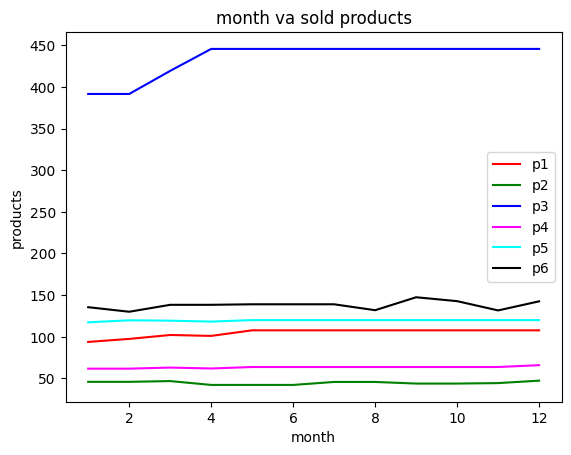

In [52]:
month=data.iloc[:12,[3]].values
plt.plot(month,p1,c='red',label='p1')
plt.plot(month,p2,c='green',label='p2')
plt.plot(month,p3,c='blue',label='p3')
plt.plot(month,p4,c='magenta',label='p4')
plt.plot(month,p5,c='cyan',label='p5')
plt.plot(month,p6,c='black',label='p6')
plt.title('month va sold products')
plt.xlabel('month')
plt.ylabel('products')
plt.legend()
plt.show()

In [53]:
p1

[93.84907531738281,
 97.48054504394531,
 102.17949676513672,
 101.08075714111328,
 107.78118896484375,
 107.78118896484375,
 107.78118896484375,
 107.78118896484375,
 107.78118896484375,
 107.78118896484375,
 107.78118896484375,
 107.78118896484375]

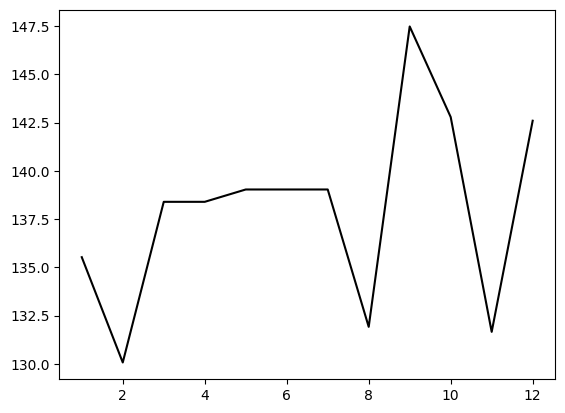

In [54]:
plt.plot(month,p6,c='black',label='p6')

# pickle

In [55]:
import pickle
pickle.dump(piper,open('dp2prod.pkl','wb'))

In [56]:
pip freeze > requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [57]:
!pip install session-info


   ---------------------------------------- 2/2 [session-info]



In [58]:
import session_info
session_info.show()